#### 1a. Import relevant libraries 

In [1]:

# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['axes.grid']=True
print("Libraries imported.")


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Libraries imported.


#### 1b. Load the data

In [2]:

# Load the data
CSV = r"C:\Users\Admin\OneDrive\Attachments\Desktop\wineQualityReds.csv"
df = pd.read_csv(CSV)

# Normalize columns to dot.case so 'fixed.acidity' exists exactly
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(r'\s+', '.', regex=True)
                .str.replace('-', '.', regex=False))
print("Shape:", df.shape)
df.head()


Shape: (1599, 13)


,unnamed:.0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,ph,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 1c. Exploring the data

In [3]:

# Preview, info, and summary
display(df.head())
display(df.info())
display(df.describe().T)

# Missing values
df.isna().sum().sort_values(ascending=False)


,unnamed:.0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,ph,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unnamed:.0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   ph                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


None

,count,mean,std,min,25%,50%,75%,max
unnamed:.0,1599.0,800.000000,461.735855,1.00000,400.5000,800.00000,1199.500000,1599.00000
fixed.acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile.acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric.acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual.sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free.sulfur.dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total.sulfur.dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
ph,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000


unnamed:.0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 1d. Choosing a dependent variable

In [4]:

# Choose target and features
target = 'fixed.acidity'
assert target in df.columns, f"'{target}' not found in columns: {list(df.columns)}"
y = df[target]
X = df.drop(columns=[target])
print("Target:", target, "| Features:", list(X.columns)[:8], "...")


Target: fixed.acidity | Features: ['unnamed:.0', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density'] ...


#### 2a. Visualizing correlations 
The heading of this stage of the data science pipeline ('Cleaning, Transforming, and Visualizing') doesn't imply that we have to do all of those operations in *that order*. Sometimes (and this is a case in point) our data is already relatively clean, and the priority is to do some visualization. Normally, however, our data is less sterile, and we have to do some cleaning and transforming first prior to visualizing. 

In [5]:

# Correlation matrix
corr = df.corr(numeric_only=True)
# Sorted correlation with target
corr[target].sort_values(ascending=False)


fixed.acidity           1.000000
citric.acid             0.671703
density                 0.668047
sulphates               0.183006
quality                 0.124052
residual.sugar          0.114777
chlorides               0.093705
alcohol                -0.061668
total.sulfur.dioxide   -0.113181
free.sulfur.dioxide    -0.153794
volatile.acidity       -0.256131
unnamed:.0             -0.268484
ph                     -0.682978
Name: fixed.acidity, dtype: float64

#### 3a. Train/Test Split
While this dataset is super clean, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.

You'll recall from p.158 of *AoS* that such a split is important good practice when evaluating statistical models. On p.158, Professor Spiegelhalter was evaluating a classification tree, but the same applies when we're doing regression. Normally, we train with 75% of the data and test on the remaining 25%. 

To be sure, for our first model, we're only going to focus on two variables: fixed acidity as our dependent variable, and density as our sole independent predictor variable. 

We'll be using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) here. Don't worry if not all of the syntax makes sense; just follow the rationale for what we're doing. 

In [6]:

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1279, 12), (320, 12), (1279,), (320,))

#### 3b. Making a Linear Regression model: our first model
Sklearn has a [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function built into the linear_model module. We'll be using that to make our regression model. 

Using single predictor: ph
RMSE: 1.2785930129836645 R2: 0.4991930581486945


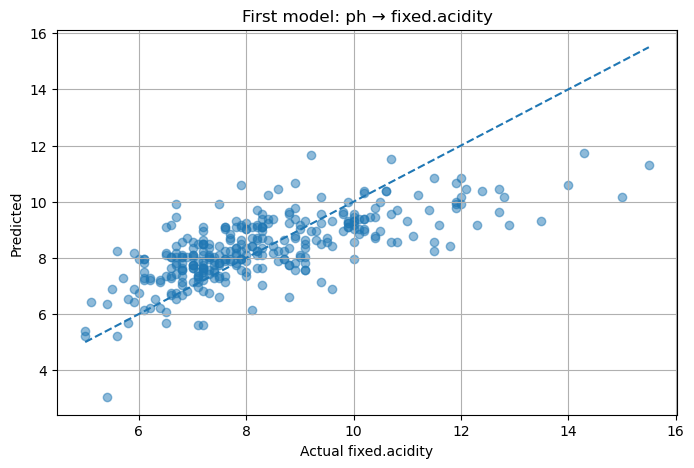

In [7]:

# Use the single strongest correlate to 'fixed.acidity' (excluding itself)
top_feat = corr[target].drop(labels=[target]).abs().sort_values(ascending=False).index[0]
print("Using single predictor:", top_feat)

lr1 = LinearRegression().fit(X_train[[top_feat]], y_train)
pred1 = lr1.predict(X_test[[top_feat]])

rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
r21 = r2_score(y_test, pred1)
print("RMSE:", rmse1, "R2:", r21)

# Plot predicted vs actual
plt.scatter(y_test, pred1, alpha=0.5)
mn, mx = y_test.min(), y_test.max()
plt.plot([mn, mx], [mn, mx], '--')
plt.xlabel('Actual fixed.acidity'); plt.ylabel('Predicted'); plt.title(f'First model: {top_feat} → fixed.acidity')
plt.show()


#### 3c. Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [8]:

# OLS with the same single predictor
X_train_sm = sm.add_constant(X_train[[top_feat]], has_constant='add')
ols_simple = sm.OLS(y_train, X_train_sm).fit()
print(ols_simple.summary())

# Evaluate on test
X_test_sm = sm.add_constant(X_test[[top_feat]], has_constant='add')
pred_ols = ols_simple.predict(X_test_sm)
rmse_ols = np.sqrt(mean_squared_error(y_test, pred_ols))
r2_ols = r2_score(y_test, pred_ols)
rmse_ols, r2_ols


                            OLS Regression Results                            
Dep. Variable:          fixed.acidity   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1076.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          1.16e-171
Time:                        21:59:07   Log-Likelihood:                -2120.3
No. Observations:                1279   AIC:                             4245.
Df Residuals:                    1277   BIC:                             4255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3935      0.765     43.642      0.0

(1.278593012983664, 0.49919305814869486)

#### 3d. Making a Linear Regression model: our third model: multiple linear regression
Remember, as Professor Spiegelhalter explains on p.132 of *AoS*, including more than one explanatory variable into a linear regression analysis is known as ***multiple linear regression***. 

RMSE: 0.5796275121524185 R2: 0.8970790778393268


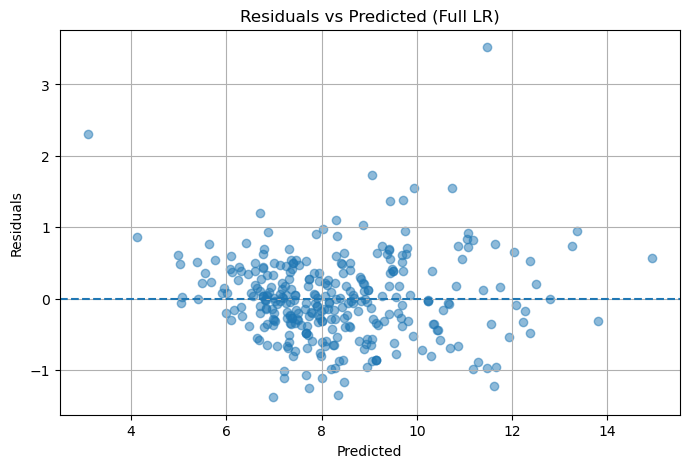

In [9]:

# Multiple linear regression using all features
lr_full = LinearRegression().fit(X_train, y_train)
pred_full = lr_full.predict(X_test)

rmse_full = np.sqrt(mean_squared_error(y_test, pred_full))
r2_full = r2_score(y_test, pred_full)
print("RMSE:", rmse_full, "R2:", r2_full)

# Residuals plot
resid = y_test - pred_full
plt.scatter(pred_full, resid, alpha=0.5)
plt.axhline(0, ls='--')
plt.xlabel('Predicted'); plt.ylabel('Residuals'); plt.title('Residuals vs Predicted (Full LR)')
plt.show()


#### 3e. Making a Linear Regression model: our fourth model: avoiding redundancy 

In [10]:

# Compute VIF on training data and iteratively drop features with VIF>10
import pandas as pd
Xv = sm.add_constant(X_train, has_constant='add')
def compute_vif_frame(X_with_const):
    return pd.DataFrame({
        'feature': X_with_const.columns,
        'VIF': [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    })

vif_df = compute_vif_frame(Xv)
drop_set = set()
while True:
    high = vif_df[vif_df['feature']!='const'].sort_values('VIF', ascending=False).iloc[0]
    if high['VIF'] <= 10:
        break
    drop_set.add(high['feature'])
    Xv = Xv.drop(columns=[high['feature']])
    vif_df = compute_vif_frame(Xv)

keep_feats = [c for c in X_train.columns if c not in drop_set]
print("Dropped due to high VIF:", sorted(drop_set))
print("Kept features:", keep_feats)

# Refit LR on reduced set
lr_reduced = LinearRegression().fit(X_train[keep_feats], y_train)
pred_red = lr_reduced.predict(X_test[keep_feats])
rmse_red = np.sqrt(mean_squared_error(y_test, pred_red))
r2_red = r2_score(y_test, pred_red)
print("Reduced model → RMSE:", rmse_red, "R2:", r2_red)


Dropped due to high VIF: []
Kept features: ['unnamed:.0', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']
Reduced model → RMSE: 0.5796275121524185 R2: 0.8970790778393268
